### Lab 4 - IA


In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Task 1.1:
- Leer CSV
- Almacenarlo en un numpy.array

In [3]:

#Lectura CSV
kc_houseData = pd.read_csv('kc_house_data.csv')

# CSV a np.array
kc_Array = kc_houseData.values

kc_houseData.head()






,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Task 1.2
- Modelo polinomial que relacione variables de price y sqft living.


Para este inciso, primero se realizó directamente sobre un dataframe de pandas.
Luego, se realizó, como se solicitó, con un array de numpy.

Cabe destacar que se dejaron ambas versiones como método de verificación del proceso correcto.
La primera queda como prueba adicional de concepto del correcto funcionamiento y verificación de datos.

Finalmente, se realizó una regresión lineal polinómica como se solicitó en este inciso.



In [4]:
"""
PROCESO REALIZADO CON PANDAS DATAFRAME

Usado como verificación de los resultados obtenidos con numpy

"""

# Extracción de variables
sqft_living = kc_houseData["sqft_living"].values.reshape(-1,1)
price = kc_houseData["price"].values

# Modelo de regresión lineal
model1 = LinearRegression()

# Entrenamiento del modelo
model1.fit(sqft_living, price)

print("Coeficiente:", model1.coef_)
print("Intercepto:  ",model1.intercept_)


Coeficiente: [280.6235679]
Intercepto:   -43580.743094473146


In [5]:

"""
PROCESO REALIZADO CON NUMPY ARRAY
Según lo solicitado en el enunciado.
Se obtienen los mismos resultados que con pandas.
"""

# Extracción de variables
sqftliving = kc_Array[:, 5].reshape(-1,1)
price2 = kc_Array[:, 2]

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(sqftliving, price2)

print("Coeficiente:", model.coef_)
print("Intercepto:  ",model.intercept_)

Coeficiente: [280.6235679]
Intercepto:   -43580.743094473146


In [6]:
# Selección de variables
sqftliving_poly = kc_Array[:, 5].reshape(-1,1)
price_poly = kc_Array[:, 2]

# Matriz polinomial de segundo grado
sqftPoli = np.ones((sqftliving_poly.shape[0], 1))
for i in range(1, 3):
    sqftPoli = np.concatenate((sqftPoli, sqftliving_poly**i), axis=1)

# XTX y XTY
X_transpose = sqftPoli.T
XTX = X_transpose.dot(sqftPoli).astype('float64')
XTY = X_transpose.dot(price_poly).astype('float64')

# Coeficientes beta
beta = np.linalg.solve(XTX, XTY)

# Cálculo de la pérdida al cuadrado
y_pred = sqftPoli.dot(beta)
perdida = np.mean((price_poly - y_pred)**2)
print('Pérdida:', np.mean((price_poly - y_pred)**2))

# Cálculo de w0 y w1
w0 = beta[0]
w1 = beta[1] + 2*beta[2]*sqftliving_poly.mean()
print('w0:', w0)
print('w1:', w1)

Pérdida: 62975083210.965614
w0: 199222.27930551543
w1: 228.48440358227515


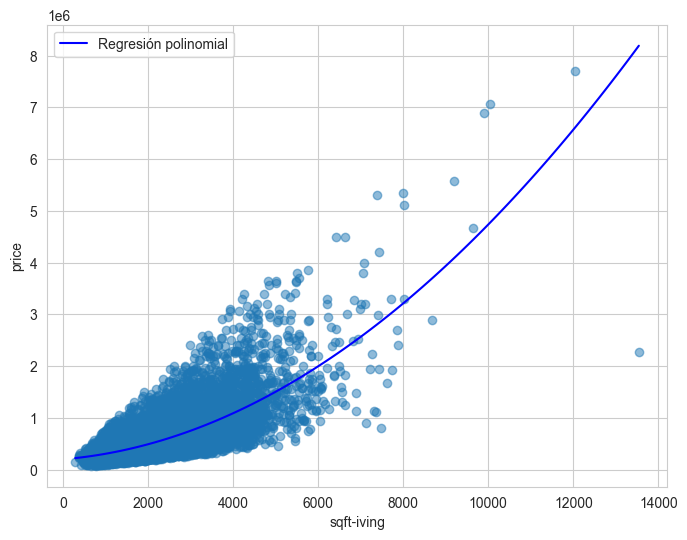

In [10]:
# Gráfico de datos y predicciones
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(sqftliving_poly, price_poly, alpha=0.5)
x_range = np.linspace(sqftliving_poly.min(), sqftliving_poly.max(), 100)
y_range = beta[0] + beta[1]*x_range + beta[2]*x_range**2
plt.plot(x_range, y_range, color='b', label='Regresión polinomial')
plt.legend()
plt.xlabel('sqft-iving')
plt.ylabel('price')
plt.show()

#### Task 1.3
- Implementación vectorial del algoritmo de regresión lineal

In [16]:
t = np.multiply(beta, XTY)
p1 = np.subtract(t,np.multiply(sqftliving_poly, beta)).T
p2 = np.subtract(t,np.multiply(sqftliving_poly, beta))
L = np.matmul(p1,p2) * 1/sqftliving_poly.shape[0]

print(t)
print(p1)
print(p2)
print(L)

[2.32550673e+15 1.99864613e+15 3.53209181e+15]
[[2325506491173822.5 2325506214254854.0 2325506572854957.0 ...
  2325506523049387.0 2325506407500465.0 2325506523049387.0]
 [1998646129905771.0 1998646129811259.2 1998646129933648.5 ...
  1998646129916650.0 1998646129877213.5 1998646129916650.0]
 [3532091808791336.0 3532091808791282.5 3532091808791352.0 ...
  3532091808791342.0 3532091808791320.0 3532091808791342.0]]
[[2325506491173822.5 1998646129905771.0 3532091808791336.0]
 [2325506214254854.0 1998646129811259.2 3532091808791282.5]
 [2325506572854957.0 1998646129933648.5 3532091808791352.0]
 ...
 [2325506523049387.0 1998646129916650.0 3532091808791342.0]
 [2325506407500465.0 1998646129877213.5 3532091808791320.0]
 [2325506523049387.0 1998646129916650.0 3532091808791342.0]]
[[5.407979606657675e+30 4.6478641901955535e+30 8.213901795532358e+30]
 [4.6478641901955535e+30 3.9945863523427406e+30 7.059401623896478e+30]
 [8.213901795532358e+30 7.059401623896478e+30 1.247567254572449e+31]]


#### Task 1.4
- Cross-validation del grado del polinomio que mejor describe la nube de puntos

#### Task 1.5
- Análisis de hallazgos:

    - 1.
    - 2.
    - 3.